# Homework 09
Collin Stewart  
https://github.com/collings512/BIOS512_Collin_Stewart

This homework is based on the classification and regression lectures.

In [3]:
install.packages("glmnet")

library(tidyverse)
library(dplyr)
library(glmnet)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula.

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** |An encoding method that converts each category of a categorical variable into a separate binary (0/1) column. |
| **Feature selection*** |An element of regression that restricts our regression analysis to only the most important variables. |
| **Classifier** |A model that assigns inputs to categories (classes) instread of predicting numeric values.|
| **Precision** |Precision = true positives / (true positives + false positives)  |
| **Recall** |Recall = true positives / (true positives + false negatives)  |
| **F1 Score** |F1 = 2 / [(1/precision) + (1/recall)]. The harmonic mean of the precision and the recall.  |
| **Parsimonious model** |A model that is as simple as possible and uses as few parameters as possible while still explaining the data effectively.|
| **Ridge regression** |A regression method that applies a squared penalty to coefficients and shrinks them twoards zero, but not exactly zero.|
| **LASSO regression** |A regression method that applies an absolute penalty to coefficients, allowing us to shrink them to zero and perform variable selection.|
| **Cross validation** |A method of model comparison that splits the data into training and testing sets to assess how well a model can be generalized to new data.|
| **Tree based methods** |A method that splits data into groups based on independent variables, chopping the dataset into smaller pieces and making the problem easier to solve.  |

*Just give the general idea.

## Question 2
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?

A perfect classifier will look like a rectangle, while a bad classifier will be exactly the line y=x.

#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

When an F1 score is close to 1, it means that a model is "good", and has both a precision and recall score that are very close to 1 (2/ ~2). This means that there are few false positive and false negative errors. An F1 score close to 0 means that the model is "poor, and has precision and recall scores that are very low (2 / large denominator). This indicates high rates of false positives and/or false negatives.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | Linear |S |
| **Dependent Variable Type** | Continuous | Categorical (binary)|
| **Purpose** (regression or classification) | Regression | Classification |
| **Range of output variable** ($y_i$ or $p_i$) | $y_i$ (-infinity to positive infinity) | $p_i$ (0 to 1) |
| **Method*** | Ordinary least squares | Maximum likelihood estimation |
| **Example of use** | Predicting blood lead levels based on occupation and proximity to contaminants | Predicting COVID-19 infection status (yes/no) based on health data, symptoms, and exposure to infected individuals |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).  

It is important because without testing and training, the model has seen every observation and you we don't have any idea about how it will generalize to new data. To test and train, we need to load, clean, and scale the data, then split it into testing and training subsets. We fit the model on training data only, then have the model predict on the test data before making a predited vs. actual plot and a residual density plot.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [4]:
housingdf <- read.csv("housing.csv")
summary(housingdf)


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

Linear regression would be appropriate here because all 8 variables are numeric/continuous values. Linear regression would help us to estimate these values.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [5]:
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

housing_scaled <- housingdf %>%
    select(where(is.numeric)) %>%
    mutate(across(where(is.numeric),scale))

set.seed(123)

train <- runif(nrow(housing_scaled)) < 0.75
test <- !train


#### c) Fit the model.

In [6]:
fit = median_house_value ~ longitude + latitude +
      housing_median_age + total_rooms + population +
      households + median_income

model <- lm(fit, data=housing_scaled %>% filter(train))
summary(model)


Call:
lm(formula = fit, data = housing_scaled %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

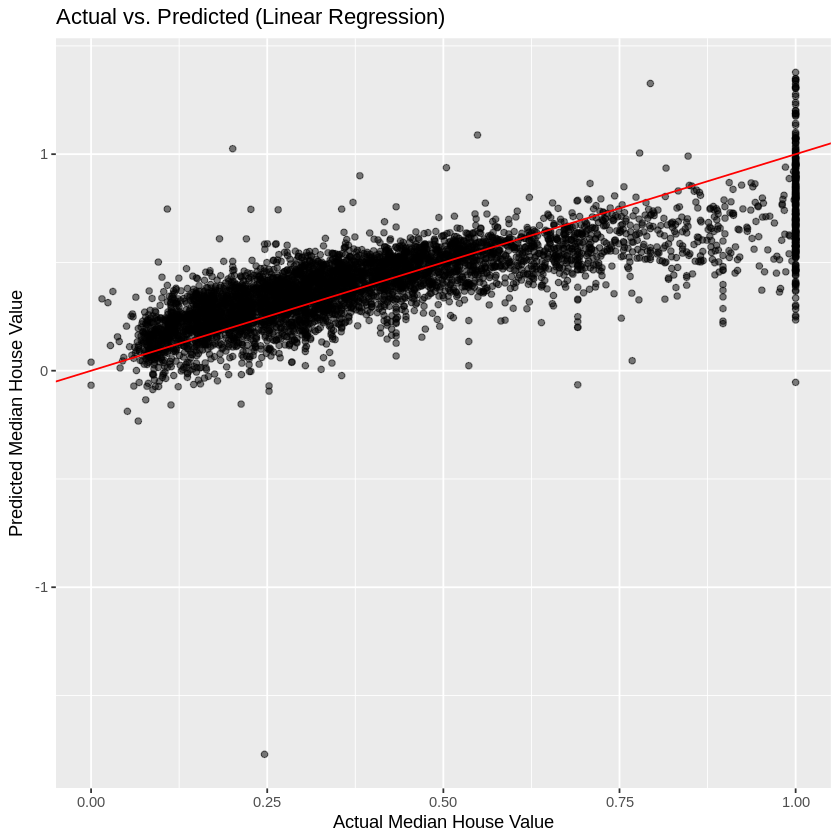

In [7]:
hs <- housing_scaled[test,]

hs <- hs %>%
      mutate(median_house_value_pred = predict(model, newdata = hs))

ggplot(hs, aes(x=median_house_value, y=median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope=1, intercept = 0, color = "red") +
  labs(title = "Actual vs. Predicted (Linear Regression)",
      x = "Actual Median House Value",
      y = "Predicted Median House Value")

#### e) Make a residuals plot.

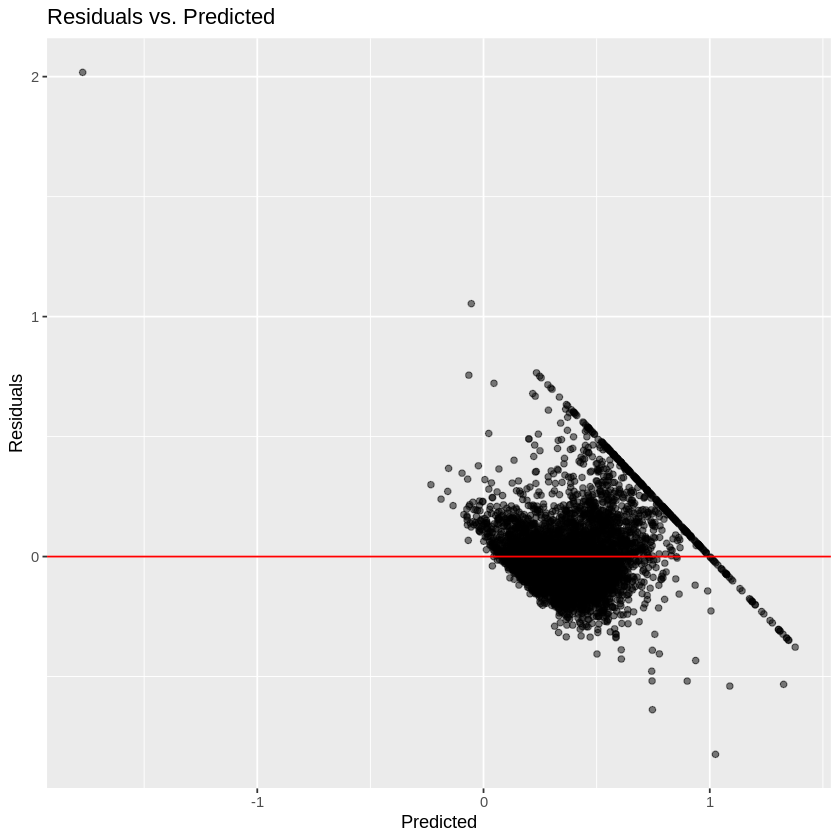

In [8]:
ggplot(hs, aes(x = median_house_value_pred, y = median_house_value - median_house_value_pred)) +
    geom_point(alpha = 0.5) +
    geom_hline(yintercept = 0, color = "red") +
    labs(title = "Residuals vs. Predicted", x = "Predicted", y = "Residuals")


## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables.
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [9]:
diabetesdf <- read.csv("diabetes.csv")
summary(diabetesdf)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

Logistic regression would be appropriate in this case because the outcome variable type is categorical/binary and value is either 1 or 0, indicating a person either having or not having diabetes.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [10]:
diabetes_scaled <- diabetesdf %>% select(where(is.numeric)) %>%
      mutate(across(where(is.numeric), scale))

set.seed(123)
n <- nrow(diabetes_scaled)

train_idx <- sample.int(n, size = floor(0.1*n))
d_train <- diabetes_scaled %>% slice(train_idx)
d_test <- diabetes_scaled %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("diabetes_train.csv")
d_test %>% write_csv("diabetes_test.csv")

#### c) Fit the model.

In [12]:
fit <- Outcome ~.
model_diabetes <- glm(fit, data=d_train, family = binomial())

summary(model_diabetes)


Call:
glm(formula = fit, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of Fisher 

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy.

In [13]:
p <- predict(model_diabetes, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

truepos <- sum(pred == 1 & truth == 1)
falsepos <- sum(pred == 1 & truth == 0)
trueneg <- sum(pred == 0 & truth == 0)
falseneg <- sum(pred == 0 & truth == 1)

accuracy <- (truepos + trueneg) / (truepos + falsepos + trueneg + falseneg)

preddf <- tibble (
      measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
      value = c(truepos, falsepos, trueneg, falseneg, accuracy)
)

preddf

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

[1] 0.05480833

9 x 1 sparse Matrix of class "dgCMatrix"
                         lambda.min
(Intercept)               -4.653919
Pregnancies                1.073443
Glucose                    3.455152
BloodPressure              .       
SkinThickness              .       
Insulin                    .       
BMI                        3.507260
DiabetesPedigreeFunction   .       
Age                        .       

measure,value
<chr>,<dbl>
True Positive,120.0000000
False Positive,31.0000000
True Negative,420.0000000
False Negative,121.0000000
Accuracy,0.7803468


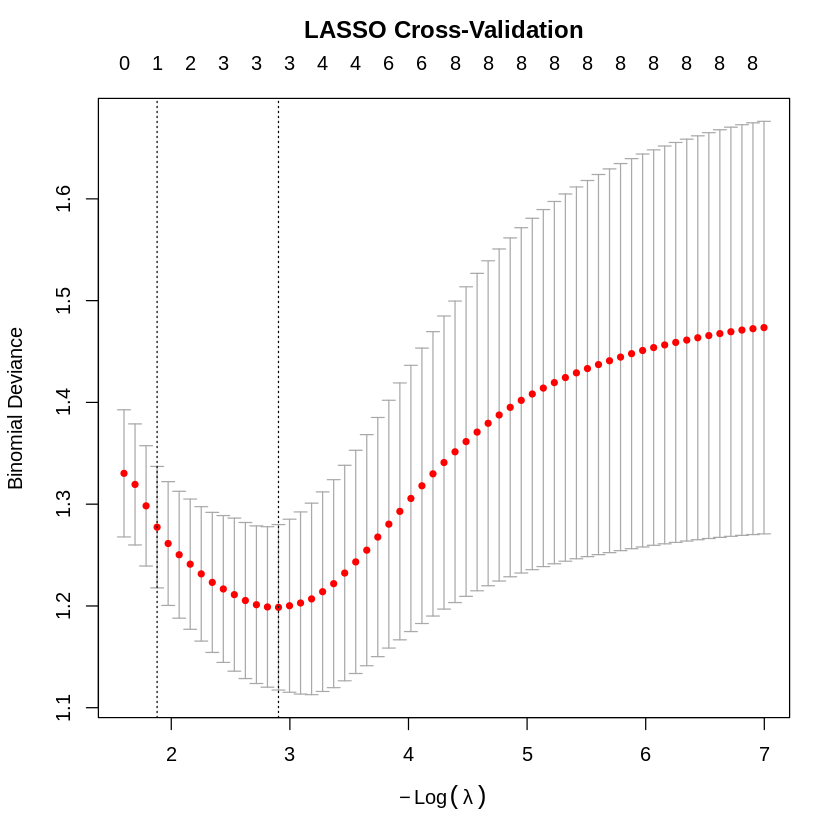

In [14]:
x_train <- model.matrix(Outcome ~., d_train)[,-1]
y_train <- d_train$Outcome
x_test <- model.matrix(Outcome ~., d_test)[,-1]
y_test <- d_test$Outcome

set.seed(123)
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1, family = "binomial")

plot(cv_lasso)
title("LASSO Cross-Validation", line = 2.5)

cv_lasso$lambda.min

coef(cv_lasso, s = "lambda.min")

lasso_pred_prob <- predict(cv_lasso, newx = x_test, s = "lambda.min", type = "response")
lasso_pred <- as.integer(lasso_pred_prob >= 0.5)

truepos <- sum(lasso_pred == 1 & y_test == 1)
falsepos <- sum(lasso_pred == 1 & y_test == 0)
trueneg <- sum(lasso_pred == 0 & y_test == 0)
falseneg <- sum(lasso_pred == 0 & y_test == 1)
accuracy <- (truepos + trueneg) / (truepos + falsepos + trueneg + falseneg)

tibble(
    measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
    value = c(truepos, falsepos, trueneg, falseneg, accuracy)
)

#### f) Make a plot of actual vs. predicted values for the LASSO model.

Warning message in geom_smooth(metohd = "loess", se = FALSE, color = "blue"):
“Ignoring unknown parameters: `metohd`”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


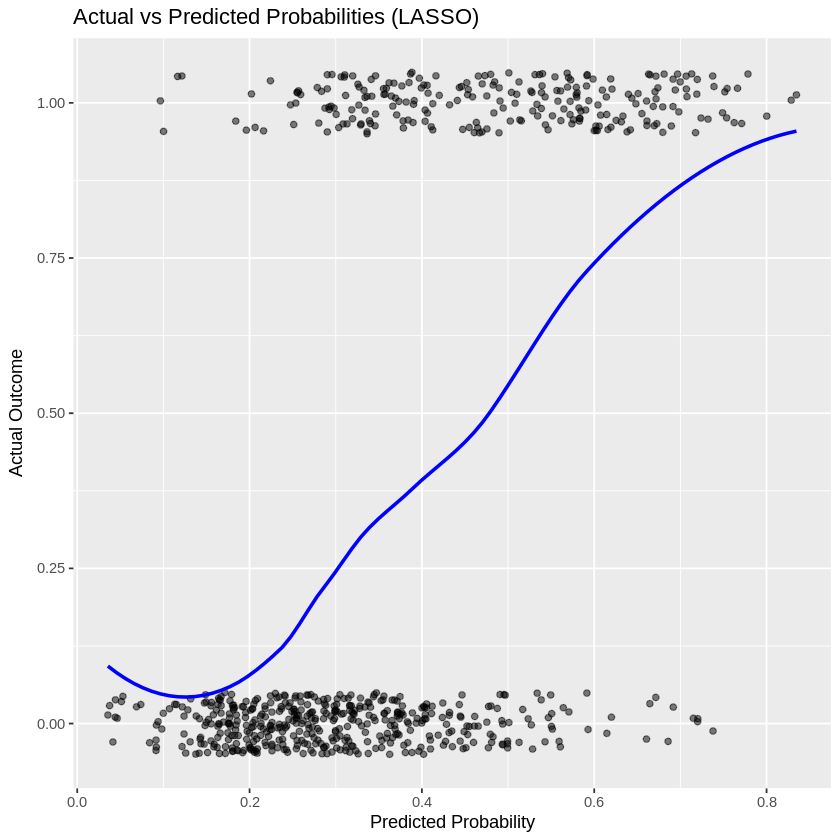

In [15]:
ggplot(data.frame(y_test, lasso_pred_prob),
    aes(x = lasso_pred_prob, y = y_test)) +
    geom_jitter(height = 0.05, alpha = 0.5) +
    geom_smooth(metohd = "loess", se = FALSE, color = "blue") +
    labs(title = "Actual vs Predicted Probabilities (LASSO)",
      x = "Predicted Probability", y = "Actual Outcome")